# Projet IRIS
### Luka Signe--Morice
---

In [100]:
#Imports

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [101]:
# Load the Iris dataset
df = pd.read_csv('iris.csv')

---

### Question 1
Provide a binary representation of the Iris data in such a way that all attribute values of each row will be described by the labels corresponding to the discretization schema of table 1. Thereby, the set of all items of the resulting transaction dataset will be constituted by all the values of the label column.

In [102]:
# Discretize the numeric attributes
bins = [4.3, 5.55, 6.15, 7.9]
labels = ['sl1', 'sl2', 'sl3']
df['sepal_length'] = pd.cut(x=df['sepal_length'], bins=bins, labels=labels, include_lowest=True)

bins = [2.0, 2.95, 3.35, 4.4]
labels = ['sw1', 'sw2', 'sw3']
df['sepal_width'] = pd.cut(x=df['sepal_width'], bins=bins, labels=labels, include_lowest=True)

bins = [1.0, 2.45, 4.75, 6.9]
labels = ['pl1', 'pl2', 'pl3']
df['petal_length'] = pd.cut(x=df['petal_length'], bins=bins, labels=labels, include_lowest=True)

bins = [0.1, 0.8, 1.75, 2.5]
labels = ['pw1', 'pw2', 'pw3']
df['petal_width'] = pd.cut(x=df['petal_width'], bins=bins, labels=labels, include_lowest=True)

# Discretize the class attribute
bins = ['setosa', 'versicolor', 'virginica']
labels = ['c1', 'c2', 'c3']
df['species'] = df['species'].replace({'setosa': 'c1', 'versicolor': 'c2', 'virginica': 'c3'})

In [87]:
# Transform the data into a binary representation

df_asList = df.values.tolist()
encoder = TransactionEncoder().fit(df_asList)
df_encoded = pd.DataFrame(encoder.transform(df_asList), columns=encoder.columns_)
df_encoded

,c1,c2,c3,pl1,pl2,pl3,pw1,pw2,pw3,sl1,sl2,sl3,sw1,sw2,sw3
0,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
1,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
2,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False
146,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False
147,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False
148,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True


---

### Question 2
Generate all class-specific association rules using minsup = 10 (absolute frequency value)
and a minimum lift value of 0.1.

In [103]:
# Generate frequent itemsets
minsup = 10/len(df_encoded)
frequent_itemsets = apriori(df_encoded, min_support=minsup, use_colnames=True)

# Generate association rules
asso_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.1)
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pl1),(c1),0.333333,0.333333,0.333333,1.000000,3.000000,0.222222,inf,1.000000
1,(c1),(pl1),0.333333,0.333333,0.333333,1.000000,3.000000,0.222222,inf,1.000000
2,(c1),(pw1),0.333333,0.333333,0.333333,1.000000,3.000000,0.222222,inf,1.000000
3,(pw1),(c1),0.333333,0.333333,0.333333,1.000000,3.000000,0.222222,inf,1.000000
4,(c1),(sl1),0.333333,0.393333,0.313333,0.940000,2.389831,0.182222,10.111111,0.872340
...,...,...,...,...,...,...,...,...,...,...
1011,(sw2),"(c3, pw3, sl3, pl3)",0.373333,0.246667,0.133333,0.357143,1.447876,0.041244,1.171852,0.493617
1012,(c3),"(sw2, pw3, sl3, pl3)",0.333333,0.133333,0.133333,0.400000,3.000000,0.088889,1.444444,1.000000
1013,(pl3),"(sw2, c3, pw3, sl3)",0.366667,0.133333,0.133333,0.363636,2.727273,0.084444,1.361905,1.000000
1014,(pw3),"(sw2, c3, sl3, pl3)",0.306667,0.140000,0.133333,0.434783,3.105590,0.090400,1.521538,0.977885


In [89]:
# Floor infinite values in the conviction column to the maximum value in the column

max_value = asso_rules['conviction'].replace(np.inf, np.nan).max()
asso_rules['conviction'] = asso_rules['conviction'].replace(np.inf, max_value)

In [104]:
# Association rules for each class

c1_rules = asso_rules[{'c1'} == asso_rules['consequents']]
c2_rules = asso_rules[{'c2'} == asso_rules['consequents']]
c3_rules = asso_rules[{'c3'} == asso_rules['consequents']]

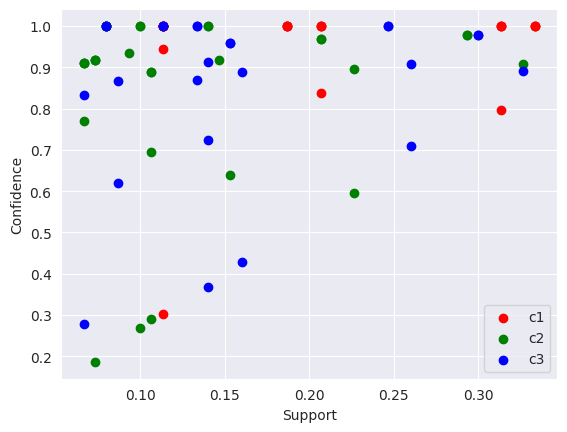

In [105]:
# Plot Support vs Confidence

plt.scatter(c1_rules['support'], c1_rules['confidence'], c='r', label='c1')
plt.scatter(c2_rules['support'], c2_rules['confidence'], c='g', label='c2')
plt.scatter(c3_rules['support'], c3_rules['confidence'], c='b', label='c3')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.show()

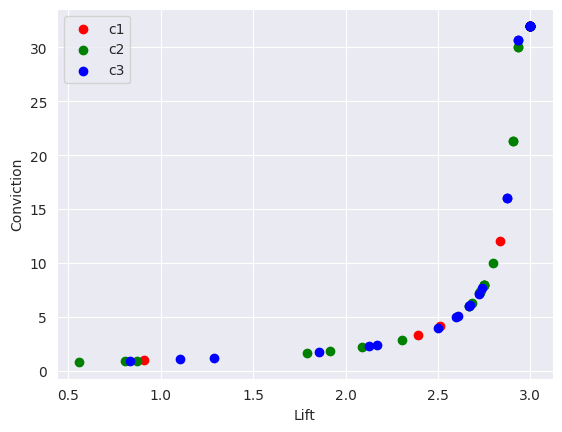

In [92]:
# Plot Lift vs Conviction

plt.scatter(c1_rules['lift'], c1_rules['conviction'], c='r', label='c1')
plt.scatter(c2_rules['lift'], c2_rules['conviction'], c='g', label='c2')
plt.scatter(c3_rules['lift'], c3_rules['conviction'], c='b', label='c3')
plt.xlabel('Lift')
plt.ylabel('Conviction')
plt.legend()
plt.show()

In [93]:
# Add antecedent length column to the association rules

c1_rules["antecedent_len"] = c1_rules["antecedents"].apply(lambda x: len(x))
c2_rules["antecedent_len"] = c2_rules["antecedents"].apply(lambda x: len(x))
c3_rules["antecedent_len"] = c3_rules["antecedents"].apply(lambda x: len(x))

/tmp/ipykernel_1136548/3667280076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1_rules["antecedent_len"] = c1_rules["antecedents"].apply(lambda x: len(x))
/tmp/ipykernel_1136548/3667280076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2_rules["antecedent_len"] = c2_rules["antecedents"].apply(lambda x: len(x))
/tmp/ipykernel_1136548/3667280076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

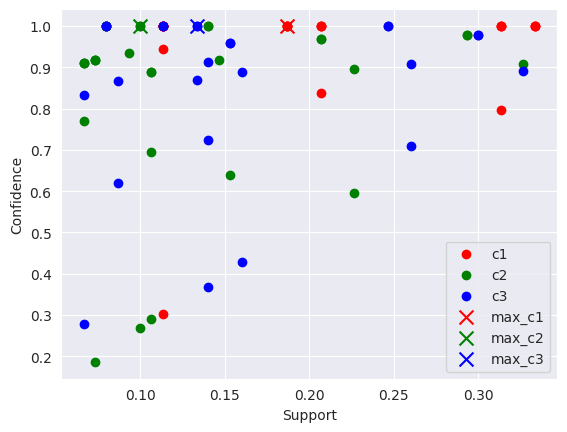

In [95]:
# Sort by antecedent length, support and then confidence
c1_rules_sorted_support = c1_rules.sort_values(by=['antecedent_len', 'support', 'confidence'], ascending=False)
c2_rules_sorted_support = c2_rules.sort_values(by=['antecedent_len', 'support', 'confidence'], ascending=False)
c3_rules_sorted_support = c3_rules.sort_values(by=['antecedent_len', 'support', 'confidence'], ascending=False)


# Plot Support vs Confidence with the max antecedent length marked
plt.scatter(c1_rules['support'], c1_rules['confidence'], c='r', label='c1')
plt.scatter(c2_rules['support'], c2_rules['confidence'], c='g', label='c2')
plt.scatter(c3_rules['support'], c3_rules['confidence'], c='b', label='c3')
plt.scatter(c1_rules_sorted_support.iloc[0]['support'], c1_rules_sorted_support.iloc[0]['confidence'], c='r', label='max_c1', marker='x', s=100)
plt.scatter(c2_rules_sorted_support.iloc[0]['support'], c2_rules_sorted_support.iloc[0]['confidence'], c='g', label='max_c2', marker='x', s=100)
plt.scatter(c3_rules_sorted_support.iloc[0]['support'], c3_rules_sorted_support.iloc[0]['confidence'], c='b', label='max_c3', marker='x', s=100)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.show()

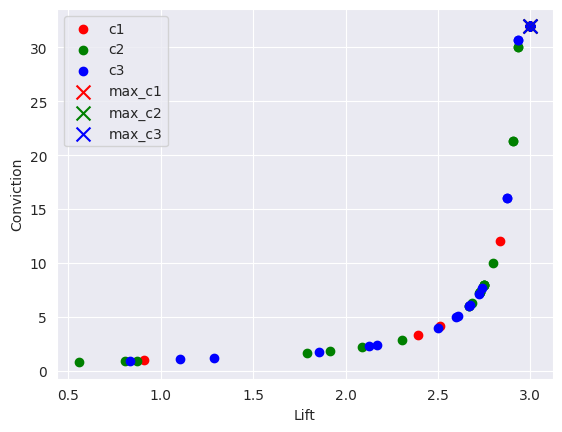

In [98]:
# Sort by antecedent length, conviction and then lift
c1_rules_sorted_conviction_lift = c1_rules.sort_values(by=['antecedent_len', 'conviction', 'lift'], ascending=False)
c2_rules_sorted_conviction_lift = c2_rules.sort_values(by=['antecedent_len', 'conviction', 'lift'], ascending=False)
c3_rules_sorted_conviction_lift = c3_rules.sort_values(by=['antecedent_len', 'conviction', 'lift'], ascending=False)

# Plot Lift vs Conviction
plt.scatter(c1_rules['lift'], c1_rules['conviction'], c='r', label='c1')
plt.scatter(c2_rules['lift'], c2_rules['conviction'], c='g', label='c2')
plt.scatter(c3_rules['lift'], c3_rules['conviction'], c='b', label='c3')
plt.scatter(c1_rules_sorted_conviction_lift.iloc[0]['lift'], c1_rules_sorted_conviction_lift.iloc[0]['conviction'], c='r', label='max_c1', marker='x', s=100)
plt.scatter(c2_rules_sorted_conviction_lift.iloc[0]['lift'], c2_rules_sorted_conviction_lift.iloc[0]['conviction'], c='g', label='max_c2', marker='x', s=100)
plt.scatter(c3_rules_sorted_conviction_lift.iloc[0]['lift'], c3_rules_sorted_conviction_lift.iloc[0]['conviction'], c='b', label='max_c3', marker='x', s=100)
plt.xlabel('Lift')
plt.ylabel('Conviction')
plt.legend()
plt.show()